In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
msa = {}
seq_file = './MSA/MALAT1/msa_MALAT1_gene_Archetypes.fasta'
with open(seq_file) as file1:
    fl = 0
    for line in file1:
        if line.startswith('>') and fl == 0:
            l = []
            name = line.rstrip().lstrip('>')
            fl = 1
        elif line.startswith('>') and fl == 1:
            msa[name] = ''.join(l)
            l = []
            name = line.rstrip().lstrip('>')
        elif not line.startswith('>'):
            l.append(line.strip())
    msa[name] = ''.join(l)

In [5]:
#Identify columns with identical nucleotides in all archetypes
letters = ['a','g','c','t']
columns = []
msalen = len(msa['Human_MALAT1'])
order = [i for i in msa]
thr = 15

for i in range(msalen):
    l = [msa[item][i] for item in order]
    if l.count('-') <= (len(order) - thr):
        for letter in letters:
            if l.count(letter) >= thr:
                columns.append(i)
print(len(columns))

908


In [6]:
#From columns to ranges
r = {}
start = 0
count = 1

for i in columns:
    if start == 0:
        start = i
        stopint = i
    if i < (stopint + 10):
        stopint += 1
        stop = i
    else:
        r[count] = [start, stop]
        count += 1
        start = i
        stopint = i

In [7]:
coor = {}
for item in order:
    coor[item] = {}
    for frag in r:
        start = len([i for i in list(msa[item])[:r[frag][0]] if i != '-'])
        stop = len([i for i in list(msa[item])[:r[frag][1]] if i != '-'])
        coor[item][frag] = [start,stop]

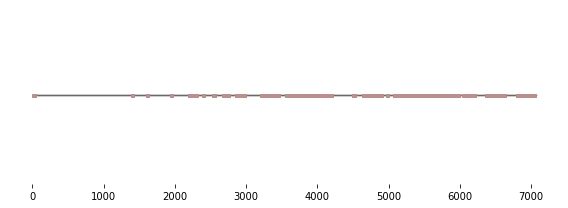

In [10]:
genome1 = 'Human_MALAT1'
length = 7075
c = 0
idx = 1
plt.figure(figsize=(8, 3))
a = [0 for i in range(length)]
for frag in coor[genome1]:
    for i in range(coor[genome1][frag][0],coor[genome1][frag][1]):
        a[i] = idx
plt.plot([idx for i in range(length)],'s',color='dimgray',markersize=0.2)

plt.plot(a, 's',markersize=3,color='rosybrown')

plt.yticks([])
plt.ylim([0.5,1.5])
plt.box(False)
plt.tight_layout()
plt.savefig('./FiguresPublication/MALAT1_IdenticalRegions.png',dpi=400)
